In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics

In [2]:
data = pd.read_csv('Problem2.csv')

print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


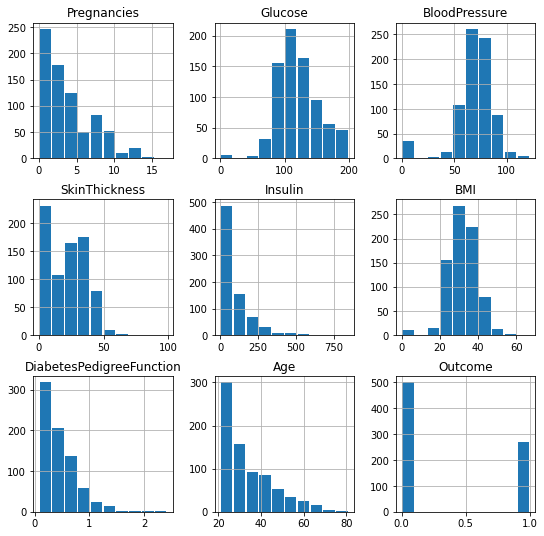

In [3]:
hist = data.hist(rwidth = 0.9, figsize = (9, 9))

In [4]:
# cleaning some data.

# removing rows that have 0 glucose, 0 BMI and 0 bloodpressure.

data_mod = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]
print(data.shape)
print(data_mod.shape)

(768, 9)
(724, 9)


In [6]:
attributes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = data_mod[attributes]
y = data_mod.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# creating the model

model = neighbors.KNeighborsClassifier(n_neighbors = 25, weights = 'uniform')

# training the model.

model.fit(X_train, y_train)

# making predictions

predictions = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, predictions)

print("Predictions : \n", predictions)
print("Actual : \n", np.array(y_test))
print("Accuracy : ", accuracy)

Predictions : 
 [0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]
Actual : 
 [0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0]
Accuracy :  0.7724137931034483
